# Exploration weather data in France

## CHEAT-SHEET

NOM_USUEL,LAT, LON, AAAAMMJJ, RR, TNTXM ,TAMPL, DG ,FFM, FF2M ,FXY, DXY, FXI2, DXI2, HXI2 

Acronyme | Signification
--- | --- 
NOM_USUEL   | nom usuel du poste
LAT         | latitude, négative au sud (en degrés et millionièmes de degrés)
LON         | longitude, négative Ã  l'ouest de GREENWICH (en degrés et millionièmes de degrÃ©)
AAAAMMJJ    | date de la mesure (année mois jour)
RR          | quantité de précipitation tombée en 24 heures.
TNTXM       | moyenne quotidienne (TN+TX)/2 (en °C et 1/10)
TAMPLI      | amplitude thermique quotidienne : écart entre TX et TN quotidiens (TX-TN) (en Â°C et 1/10)
DG          | durée de gel sous abri (T en °C) (en mn)
FFM         | moyenne quotidienne de la force du vent moyennée sur 10 mn, Ã  10 m (en m/s et 1/10)
FF2M        | moyenne quotidienne de la force du vent moyennée sur 10 mn, Ã  2 m (en m/s et 1/10)
FXY         | maximum quotidien de la force maximale horaire du vent moyennée sur 10 mn, Ã  10 m (en m/s et 1/10)
DXY         | direction de FXY (en rose de 360)
FXI2        | maximum quotidien de la force maximale horaire du vent instantanée, Ã  2 m (en m/s et 1/10)
DXI2        | direction de FXI2 (en rose de 360)
HXI2        | heure de FXI2 (hhmm)



In [18]:
import pandas as pd
from shapely import Point, Polygon
from dataclasses import dataclass
import numpy as np
from matplotlib import animation
import os
import seaborn as sns

os.chdir(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\weather_data")

In [19]:
df = pd.read_csv("France_temp_2000_2022.csv", sep=',')

In [20]:
print(df.shape, df.columns, df.dtypes, df.isnull().sum(), sep=f"\n{'----'*20}\n")
df_position = df.drop_duplicates(subset=["NOM_USUEL"], keep='first')
all_lat = [lat for lat in df_position["LAT"]]
all_lon = [lon for lon in df_position["LON"]]

(18156985, 20)
--------------------------------------------------------------------------------
Index(['Unnamed: 0', 'NOM_USUEL', 'LAT', 'LON', 'AAAAMMJJ', 'TN', 'QTN', 'HTN',
       'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM', 'TNTXM', 'QTNTXM',
       'TAMPLI', 'QTAMPLI', 'DG'],
      dtype='object')
--------------------------------------------------------------------------------
Unnamed: 0      int64
NOM_USUEL      object
LAT           float64
LON           float64
AAAAMMJJ        int64
TN            float64
QTN           float64
HTN           float64
QHTN          float64
TX            float64
QTX           float64
HTX           float64
QHTX          float64
TM            float64
QTM           float64
TNTXM         float64
QTNTXM        float64
TAMPLI        float64
QTAMPLI       float64
DG            float64
dtype: object
--------------------------------------------------------------------------------
Unnamed: 0          0
NOM_USUEL           0
LAT                 0
LON       

In [21]:
all_stations_points = [Point(all_lon[point], all_lat[point]) for point in range(0, len(all_lat))]
df_position["STATIONS_XY"] = all_stations_points

dico_station_position = dict(zip(df_position["NOM_USUEL"], df_position["STATIONS_XY"]))

# Stations on map

In [22]:
import geopandas as gpd
from matplotlib import pyplot as plt    

In [23]:
#unique_stations = df["STATIONS_XY"].unique()

In [24]:
gdf_stations = gpd.GeoDataFrame(data={'geometry':all_stations_points})
print(len(all_stations_points))

3511


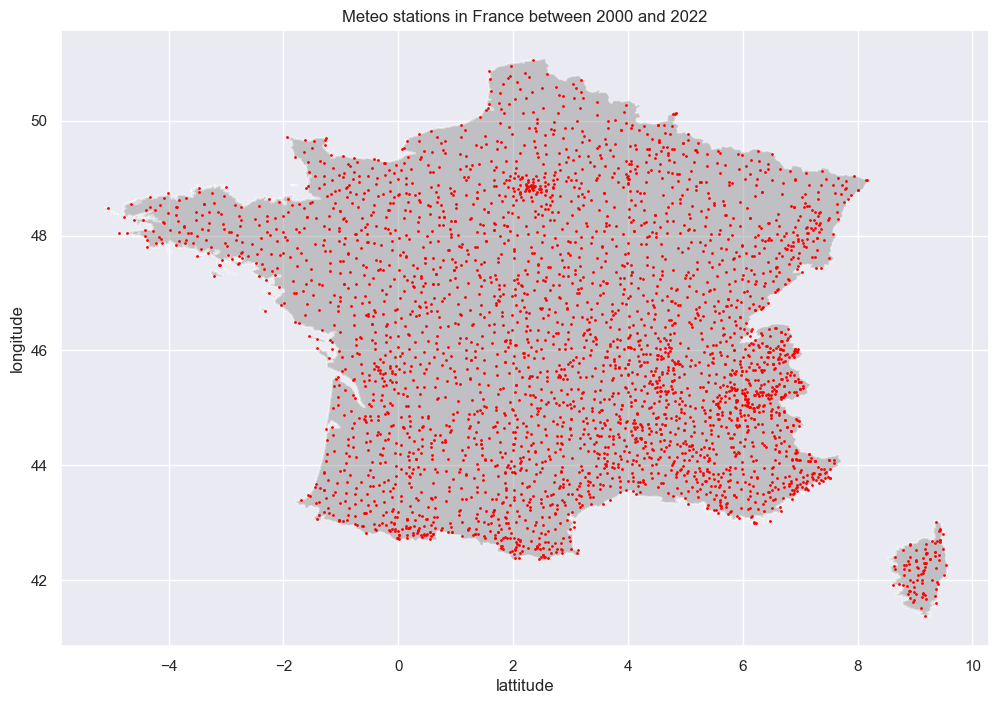

In [25]:
sns.set_theme(rc={'figure.figsize':(12,8)})

def show_on_map(stations_temp, ax=None):
    france = gpd.read_file(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\EDA_1\Data\shapefile\FRA_adm0.shp")

    france.plot(ax=ax,alpha=0.4, color='grey')
    stations_temp.plot(ax=ax,color='red', markersize=1)

fig = plt.figure(1)
ax1 = fig.subplots(1,1)
ax1.set_ylabel("longitude")
ax1.set_xlabel("lattitude")
ax1.set_title("Meteo stations in France between 2000 and 2022")
show_on_map(gdf_stations, ax1)

<bound method NDFrame.head of                                               geometry
0    POLYGON ((-4.50000 42.10714, -4.50000 42.41671...
1    POLYGON ((-4.00000 42.10714, -4.00000 42.41671...
2    POLYGON ((-3.50000 42.10714, -3.50000 42.41671...
3    POLYGON ((-3.00000 42.10714, -3.00000 42.41671...
4    POLYGON ((-2.50000 42.10714, -2.50000 42.41671...
..                                                 ...
805  POLYGON ((6.50000 50.91067, 6.50000 51.22024, ...
806  POLYGON ((7.00000 50.91067, 7.00000 51.22024, ...
807  POLYGON ((7.50000 50.91067, 7.50000 51.22024, ...
808  POLYGON ((8.00000 50.91067, 8.00000 51.22024, ...
809  POLYGON ((8.50000 50.91067, 8.50000 51.22024, ...

[810 rows x 1 columns]>


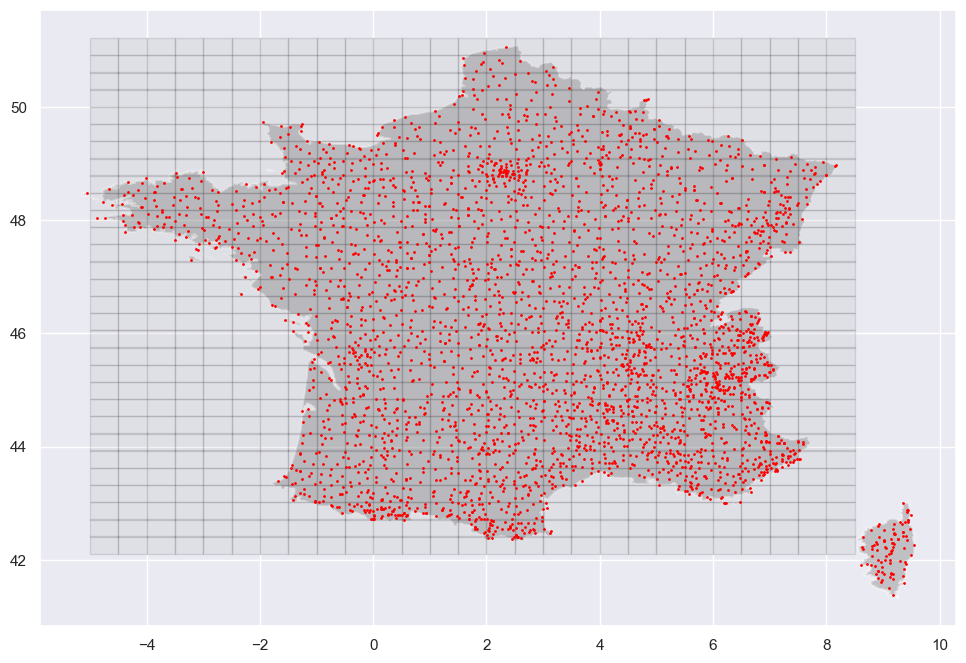

In [26]:
def show_on_map(ax=None):
    france = gpd.read_file(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\EDA_1\Data\shapefile\FRA_adm0.shp")

    france.plot(ax=ax,alpha=0.4, color='grey')
    gdf_grid.plot(ax=ax, alpha = 0.1, color = "gray", edgecolor="black", )
    gdf_stations.plot(ax=ax,color='red', markersize=1)

xs, xe, ys, ye = -4.5, -5, 41.80357, 42.11314
grid = []
for j in range(0, 30):
    ys += 0.30357
    ye += 0.30357
    for i in range(0, 27):
        grid.append(Polygon(
            (Point(xs, ys), Point(xs, ye), Point(xe, ye), Point(xe, ys))
        ))
        xs += 0.5
        xe += 0.5
    xs = -4.5
    xe = -5

gdf_grid = gpd.GeoDataFrame({"geometry": grid})
fig = plt.figure(1)
ax1 = fig.subplots(1,1)
show_on_map(ax1)

In [27]:
debug_dico = {index:poly for index, poly in enumerate(grid)}

In [28]:
@dataclass
class Station:
    nom : str
    position : Point
    def __init__(self, nom, position):
        self.nom = nom
        self.position = position

all_Stations = [Station(nom, position) for nom, position in dico_station_position.items()]

@dataclass
class Case:
    id:int
    position:Polygon
    contain_station:list
    name_station:list
    neighbour:list

    def __init__(self, id, position, contain_station, name_stations, frame, neighbour):
        self.id = id
        self.position = position
        self.contain_station = contain_station
        self.name_station = name_stations
        self.frame = frame
        self.neighbour = neighbour

all_Cases = [Case(index, polygone, [], [], pd.DataFrame(), []) for index, polygone in enumerate(grid)]

In [29]:
def contains_station(container):    
    return [station for station in all_Stations if station.position.within(container["geometry"].values)]

neighbour_rule_index = [27, -27, -1, +1, 28, -28, 26, -26]

for case in all_Cases:
    temp = gpd.GeoDataFrame({"geometry":[case.position]})
    case.contain_station = contains_station(temp) #check if the station is in the case

valid_id = [case.id for case in all_Cases]

all_Cases = [Case(case.id, case.position, case.contain_station,
                  [nom.nom for nom in case.contain_station], pd.DataFrame(),
                  [case.id+i for i in neighbour_rule_index if case.id+i in valid_id]) for case in all_Cases if case.contain_station != []]

                                              geometry
0    POLYGON ((2.50000 42.10714, 2.50000 42.41671, ...
1    POLYGON ((3.00000 42.10714, 3.00000 42.41671, ...
2    POLYGON ((0.50000 42.41071, 0.50000 42.72028, ...
3    POLYGON ((1.00000 42.41071, 1.00000 42.72028, ...
4    POLYGON ((2.00000 42.41071, 2.00000 42.72028, ...
..                                                 ...
472  POLYGON ((2.50000 50.60710, 2.50000 50.91667, ...
473  POLYGON ((3.00000 50.60710, 3.00000 50.91667, ...
474  POLYGON ((3.50000 50.60710, 3.50000 50.91667, ...
475  POLYGON ((2.00000 50.91067, 2.00000 51.22024, ...
476  POLYGON ((2.50000 50.91067, 2.50000 51.22024, ...

[477 rows x 1 columns]


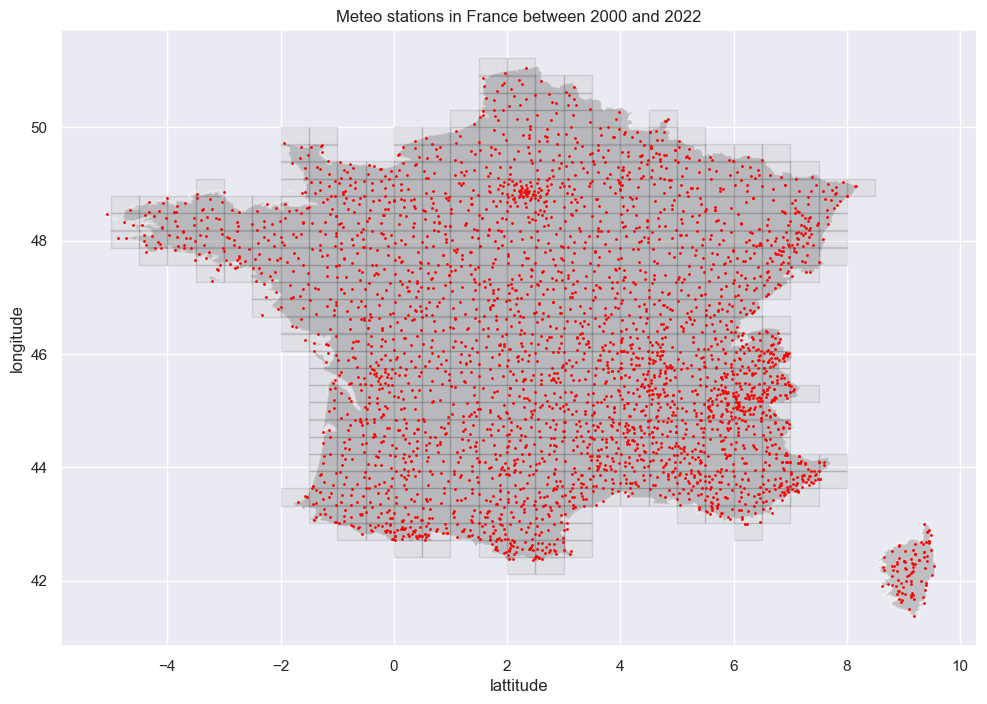

In [30]:
import geopandas as gpd

def show_on_map(ax=None):
    france = gpd.read_file(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\EDA_1\Data\shapefile\FRA_adm0.shp")

    france.plot(ax=ax,alpha=0.4, color='grey')
    gdf_grid.plot(ax=ax, alpha = 0.1, color = "gray", edgecolor="black", )
    gdf_stations.plot(ax=ax,color='red', markersize=1)

gdf_grid = gpd.GeoDataFrame({"geometry": [case.position for case in all_Cases]})
print(gdf_grid)

fig = plt.figure(1)
ax1 = fig.subplots(1,1)
ax1.set_ylabel("longitude")
ax1.set_xlabel("lattitude")
ax1.set_title("Meteo stations in France between 2000 and 2022")
show_on_map(ax1)

In [31]:
df_amp = df.drop(['Unnamed: 0', 'LAT', 'LON','QTN', 'HTN',
        'QHTN', 'QTX', 'HTX', 'QHTX', 'QTM', 'QTNTXM', 'QTAMPLI', 'DG'], axis=1)

names = df_amp.drop_duplicates(subset="NOM_USUEL")

In [32]:
noms = ["ARBENT", "ST WITZ"]

dico_frame_name = df_amp.loc[df_amp["NOM_USUEL"].isin(noms)]

In [33]:
import warnings 
warnings.filterwarnings("ignore")

def obsolete_func():
    for index, case in enumerate(all_Cases):
        temp = df_amp.loc[df_amp["NOM_USUEL"].isin(case.name_station)]
        temp = temp.drop("NOM_USUEL", axis=1)
        print(index)
        dates = temp["AAAAMMJJ"].unique()
        
        for date in dates:
            mean_temp = np.mean(temp["TNTXM"].loc[temp["AAAAMMJJ"]==date])
            temp["TNTXM"].loc[temp["AAAAMMJJ"]==date] = mean_temp
            temp = temp.drop_duplicates(subset=["AAAAMMJJ"], keep="first")

        case.frame = temp

In [34]:
all_dates = sorted(df_amp["AAAAMMJJ"].unique())
dico_dates_id = {val:str(i) for i, val in enumerate(all_dates)}
print(dico_dates_id)

{20000102: '0', 20000103: '1', 20000104: '2', 20000105: '3', 20000106: '4', 20000107: '5', 20000108: '6', 20000109: '7', 20000110: '8', 20000111: '9', 20000112: '10', 20000113: '11', 20000114: '12', 20000115: '13', 20000116: '14', 20000117: '15', 20000118: '16', 20000119: '17', 20000120: '18', 20000121: '19', 20000122: '20', 20000123: '21', 20000124: '22', 20000125: '23', 20000126: '24', 20000127: '25', 20000128: '26', 20000129: '27', 20000130: '28', 20000131: '29', 20000201: '30', 20000202: '31', 20000203: '32', 20000204: '33', 20000205: '34', 20000206: '35', 20000207: '36', 20000208: '37', 20000209: '38', 20000210: '39', 20000211: '40', 20000212: '41', 20000213: '42', 20000214: '43', 20000215: '44', 20000216: '45', 20000217: '46', 20000218: '47', 20000219: '48', 20000220: '49', 20000221: '50', 20000222: '51', 20000223: '52', 20000224: '53', 20000225: '54', 20000226: '55', 20000227: '56', 20000228: '57', 20000229: '58', 20000301: '59', 20000302: '60', 20000303: '61', 20000304: '62', 2

In [35]:
def to_csv(liste_square):
    for case in all_Cases:
        case.frame.to_csv(rf"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\weather_data\square_csv\{case.id}.csv")

In [36]:
os.chdir(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\weather_data\square_csv_untreated")

def csv_to_square(liste_cases):
    for case in liste_cases:
        case.frame = pd.read_csv(f"{case.id}.csv", sep=',')

    return liste_cases

#all_Cases = csv_to_square(all_Cases)
all_dates = [int(val) for val in dico_dates_id.values()]

In [37]:
dico_id_frame = {case.id:case.frame for case in all_Cases}
dico_id_position = {case.id:case.position for case in all_Cases}

In [41]:
def date_labelling():
    os.chdir(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\weather_data\square_csv")
    for file in os.listdir():
        temp = pd.read_csv(file, sep=',')
        temp["AAAAMMJJ"] = [int(dico_dates_id[ID]) for ID in temp["AAAAMMJJ"]]
        os.remove(file)
        temp.to_csv(str(file))

date_labelling()

In [42]:
def square_to_csv(liste_cases):
    os.chdir(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\weather_data\square_csv")
    for case in liste_cases:
        os.remove(f"{case.id}.csv")
        case.frame.to_csv(f"{case.id}.csv")

In [43]:
def gdf_case_correct(date):    
    gdf_case = gpd.GeoDataFrame({"geometry":[case.position for case in all_Cases],
                                 "temp":[case.frame["TNTXM"].loc[case.frame["AAAAMMJJ"]==date].values for case in all_Cases],
                                 "taille": [case.frame.shape[0] for case in all_Cases]})
    
    gdf_case["temp"] = [-1 if len(i) == 0 else i[0] for i in gdf_case["temp"]]
    
    return gdf_case

gdf_test_date = gdf_case_correct(5000) #new date incrementation : is around september 2013

def show_missing_data(gdf_precise_date, ax=None):
    france = gpd.read_file(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\EDA_1\Data\shapefile\FRA_adm0.shp")

    france.plot(ax=ax, alpha=0.4, color='grey')
    gdf_precise_date.plot(ax=ax, column="temp", alpha=1, legend=True, legend_kwds={"label":"Temperature", "orientation":"vertical"})
    gdf_precise_date.plot(column="taille", alpha=1, legend=True, legend_kwds={"label":"Missing data in the last 22 years", "orientation":"vertical"})

sns.set()

df_stats = pd.DataFrame({'mean':[], 'mean+std':[], "mean-std":[], 't':[]})

def show_on_map(gdf_precise_date, ax1=None, ax2=None):
    global df_stats
    france = gpd.read_file(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\EDA_1\Data\shapefile\FRA_adm0.shp")

    france.plot(ax=ax1, alpha=0.4, color='grey')
    gdf_precise_date.plot(ax=ax1, column="temp", alpha=1, legend=True, legend_kwds={"label":"Temperature", "orientation":"vertical"})

    mean, mean_plus_std, mean_minus_std = np.mean(gdf_precise_date["temp"]),max(gdf_precise_date["temp"]),min(gdf_precise_date["temp"])
    
    df_stats = pd.concat([df_stats, pd.DataFrame({'mean':[mean], 'max':[mean_plus_std], "min":[mean_minus_std]})], ignore_index=True)

    ax1.set_aspect(224/190)

    sns.lineplot(df_stats, ax=ax2, markers='.')
    ax2.set_ylim(-20, 50)


fig = plt.figure(1)
ax1, ax2 = fig.subplots(1,2)
show_on_map(gdf_test_date, ax1, ax2)

KeyError: 'TNTXM'

In [ ]:
def missing_data_square(squares : list)->list:
    return [square for square in squares if square.frame.shape[0] < 8399]

cases_missing_data = missing_data_square(all_Cases)

def check_valid_neighbor(liste_cases:list)->list:
    for case in liste_cases:
        case.neighbour = [sq for sq in case.neighbour if sq in dico_id_frame.keys()]
    return liste_cases

def correcting_missing_values(empty_squares : list) -> list:
    all_dates = [int(val) for val in dico_dates_id.values()]
    for square in empty_squares:
        for date in all_dates:
            if date not in square.frame["AAAAMMJJ"].values:
                avg_temp = np.mean([float(dico_id_frame[neighbor]["TNTXM"].loc[dico_id_frame[neighbor]["AAAAMMJJ"]==date].values) for neighbor in square.neighbour 
                                    if str(date) in dico_id_frame[neighbor]["AAAAMMJJ"].values]) + np.random.normal(0.05616677938517182, 0.48)
                square.frame.loc[len(square.frame)] = [None, None, date, None, None, None, avg_temp, None]
                
    return empty_squares

def replace_missing_data(missing :list, origin:list)->list:
    for case in missing:
        for sq in origin:
            if case.id == sq.id:
                sq = case
                break

    return origin

def gdf_case_correct(date):    
    gdf_case = gpd.GeoDataFrame({"geometry":[case.position for case in all_Cases],
                                 "temp":[case.frame["TNTXM"].loc[case.frame["AAAAMMJJ"]==date].values for case in all_Cases],
                                 "taille": [case.frame.shape[0] for case in all_Cases]})

    gdf_case["temp"] = [-1 if len(i) == 0 else i[0] for i in gdf_case["temp"]]
    return gdf_case

def show_missing_data(gdf_precise_date, ax=None):
    france = gpd.read_file(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\EDA_1\Data\shapefile\FRA_adm0.shp")

    france.plot(ax=ax, alpha=0.4, color='grey')
    gdf_precise_date.plot(ax=ax, column="temp", alpha=1, legend=True, legend_kwds={"label":"Temperature", "orientation":"vertical"})
    gdf_precise_date.plot(column="taille", alpha=1, legend=True, legend_kwds={"label":"Missing data in the last 22 years", "orientation":"vertical"})


gdf_test_date = gdf_case_correct(456) #new date incrementation : is around september 2013

fig = plt.figure(1)
ax1 = fig.subplots(1,1)
show_missing_data(gdf_test_date, ax1)

In [48]:
os.chdir(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\weather_data\square_csv")

def to_csv(liste_square):
    for case in all_Cases:
        case.frame.to_csv(rf"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\weather_data\square_csv\{case.id}.csv")

In [49]:
os.chdir(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\weather_data\square_csv")

def csv_to_square(liste_cases):
    for case in liste_cases:
        case.frame = pd.read_csv(f"{case.id}.csv", sep=',')

    return liste_cases

all_Cases = csv_to_square(all_Cases)

In [50]:
os.chdir(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\weather_data")

sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

df_stats = pd.DataFrame({'mean':[], 'mean+std':[], "mean-std":[]})

date = 4

def next_loop_event(t):
    print(f"time {t}")
    fig.clf()
    ax1, ax2 = fig.subplots(1,2)
    gdf_ttime = gdf_case_correct(t)
    show_on_map(gdf_ttime, ax1, ax2)
    return 

warnings.filterwarnings("ignore")

fig = plt.figure(1)

anim = animation.FuncAnimation(fig, next_loop_event, frames=3, interval=100, repeat=False, )
anim.save(filename=f"try_system_evolution_2000-2022.mp4", writer="ffmpeg", fps=25)

MovieWriter ffmpeg unavailable; using Pillow instead.


time 0


IndexError: list index out of range

time 0
Error in callback <function _draw_all_if_interactive at 0x0000020F25A8A700> (for post_execute), with arguments args (),kwargs {}:


TypeError: show_on_map() takes from 0 to 1 positional arguments but 3 were given

Error in callback <function flush_figures at 0x0000020F28064040> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

# Date prediction of reaching temperature threshold in each square

ADD threshold. ADD = Accumulated Day Degree. Degree days are a projection of organism development. They are a unit that represents the amount of time that an insect or other organism spends at a temperature above its lower development threshold and below its upper development threshold.  If an insect spends 24 hours one degree above its lower development threshold or the temperature beneath which its development ceases, then one-degree day has been accumulated. The higher the temperature, the more degree days acquired for that period.
For *Myzus Persicae* it is when added day degrees are over 16 degrees and the threshold is **16 degrees**.

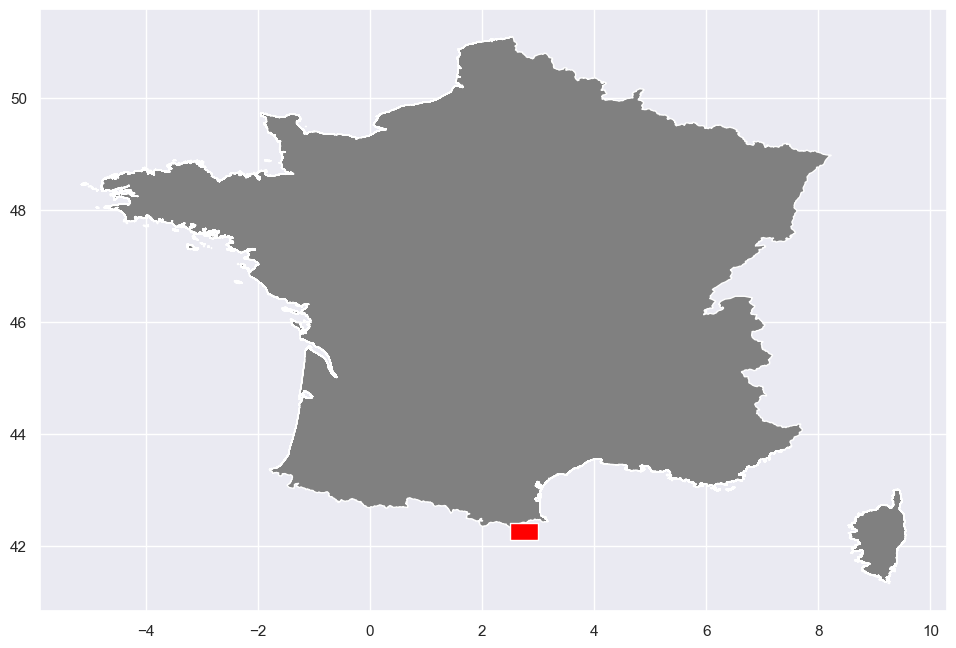

In [51]:
#date_of_threshold(all_Cases)
def test_unique_case(case_index):
    fig = plt.figure(1)
    ax = fig.subplots(1,1)

    france = gpd.read_file(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\EDA_1\Data\shapefile\FRA_adm0.shp")
    france.plot(ax=ax, alpha=1, color="grey")

    test = gpd.GeoDataFrame({"geometry":[all_Cases[case_index].position]})
    test.plot(ax=ax, alpha=1, color="red")

test_unique_case(1)

# Determining the standard error between the neighbour around a square


------------------------------------------------------------

upper limit = 1.8226715595238094
lower limit = -2.3065338214285713
mean = 0.05616677938517182
standard deviation = 0.6339502601261688
The distribution are statistically equivalent in 99.0% of cases
The distribution are statistically different in 1.0% of cases


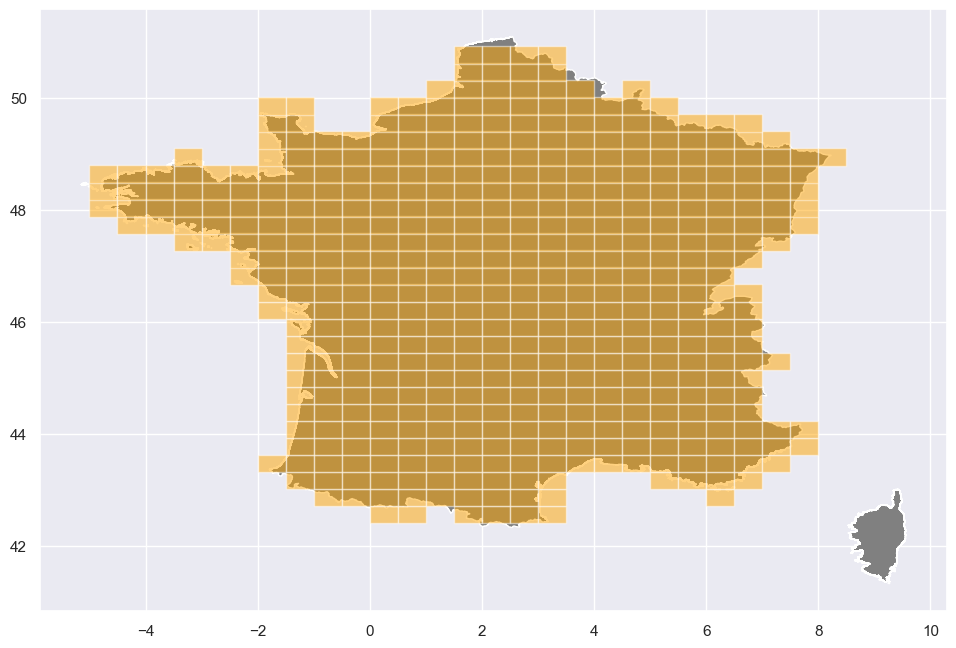

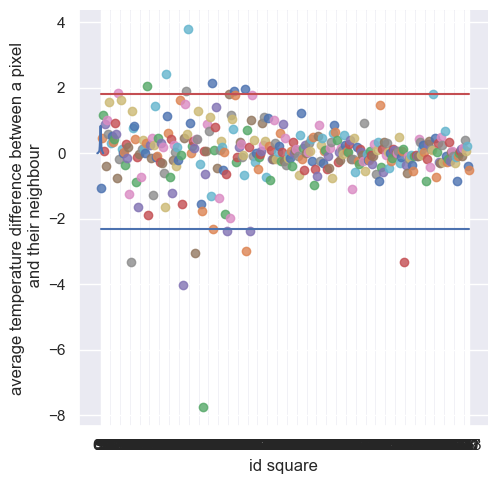

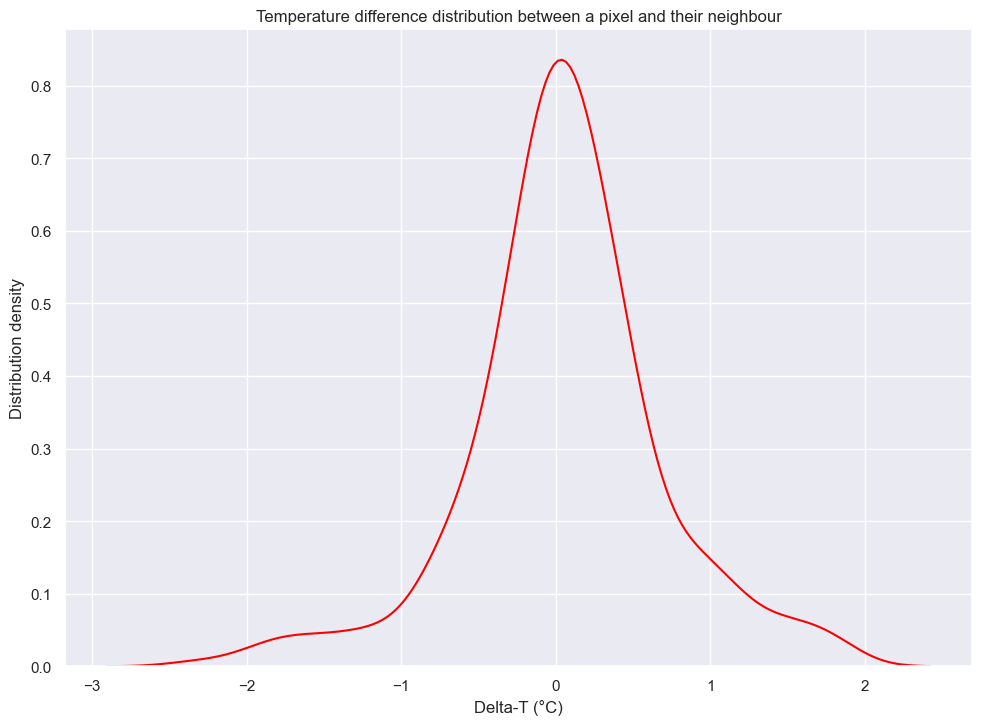

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

def csv_to_square(liste_cases:list)->list:
    os.chdir(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\weather_data\square_csv_untreated")
    for case in liste_cases:
        case.frame = pd.read_csv(f"{case.id}.csv", sep=',')

    return liste_cases

untreated_cases = csv_to_square(all_Cases)

def retain_8_neighbour_sq(liste_cases :list) -> list:
    return [case for case in liste_cases if len(case.neighbour)==8]

valid_test_pool = retain_8_neighbour_sq(untreated_cases)

dico_id_frame = {case.id:case.frame for case in all_Cases}

def frame_builder(liste_cases:list)->pd.DataFrame:
    data = {str(case.id):[] for case in liste_cases}
    for square in liste_cases:
        for date in all_dates:
            if date in square.frame["AAAAMMJJ"].values:
                try :
                    avg_temp = square.frame["TNTXM"].loc[square.frame["AAAAMMJJ"]==date].values -\
                                np.mean([dico_id_frame[neighbor]["TNTXM"].loc[dico_id_frame[neighbor]["AAAAMMJJ"]==date].values
                            for neighbor in square.neighbour if date in dico_id_frame[neighbor]["AAAAMMJJ"].values])
                    data[str(square.id)].append(np.round(float(avg_temp), 4))
                except Exception:
                    avg_temp = float(square.frame["TNTXM"].loc[valid_test_pool[0].frame["AAAAMMJJ"]==date].values)
    data = {key:val for key, val in data.items() if len(val)==8400}
    data = pd.DataFrame(data=data)                
    return data

def csv_to_square(file):
    os.chdir(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\weather_data")
    return pd.read_csv(f"{file}")

df_stder = csv_to_square("neigh_error_dataframe.csv")
df_stder = df_stder.drop('Unnamed: 0', axis=1)

def show_valid_pool_location(ax=None):
    france = gpd.read_file(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\EDA_1\Data\shapefile\FRA_adm0.shp")

    france.plot(ax=ax, alpha=1, color="grey")

    gdf = gpd.GeoDataFrame({"geometry":[case.position for case in valid_test_pool]})
    gdf.plot(ax=ax, alpha=0.5, color="orange")

fig = plt.figure(1)
ax1 = fig.subplots(1,1)
show_valid_pool_location(ax1)

def stats_frame(df : pd.DataFrame)->dict:
    dico = {key:pd.DataFrame() for key in df_stder}
    for col in df.columns:
        stats = df[col].agg(["mean", "sem"])
        stats[f'ci95_hi{col}'] = stats['mean'] + 1.96* stats['sem']
        stats[f'ci95_lo{col}'] = stats['mean'] - 1.96* stats['sem']
        dico[col] = stats
    return pd.DataFrame(dico)

df_stats_df_stder = stats_frame(df_stder)

def stats_2nd_frame(df : pd.DataFrame)-> pd.DataFrame:
    stats_df = pd.DataFrame({"avg": [df[col]["mean"] for col in df.columns]})
    stats = stats_df["avg"].agg(["mean", "sem"])
    stats[f'ci95_hi'] = stats['mean'] + 1.96* stats['sem']
    stats[f'ci95_lo'] = stats['mean'] - 1.96* stats['sem']
    return stats

df_stats2nd_round = stats_2nd_frame(df_stats_df_stder)
print(f"\n{'---'*20}\n")

def limits(df):    
    test = sorted([df[col][f"mean"] for col in df_stder.columns])
    test = test[round(0.025*len(test)):][:-round(0.025*len(test))]
    print(f"upper limit = {max(test)}\nlower limit = {min(test)}\nmean = {np.mean(test)}\nstandard deviation = {np.std(test)}")
    return test, np.mean(test), np.std(test)

test, mean, std = limits(df_stats_df_stder)

test_df = pd.DataFrame(data={"Delta-T":test})

sns.displot(test_df, x="Delta-T", kind="kde")

for col in df_stats_df_stder.columns:
    plt.scatter(col, df_stats_df_stder[col]["mean"], alpha=0.8, label=f"{col}")

plt.plot([col for col in df_stder.columns], [max(test) for col in df_stder.columns], color='r', alpha=1)
plt.plot([col for col in df_stder.columns], [min(test) for col in df_stder.columns], color='b', alpha=1)

plt.xlabel("id square")
plt.ylabel("average temperature difference between a pixel\n and their neighbour")

from scipy import stats

def assert_norm(avg, std, df, reference):
    test_norm = [np.random.normal(avg, std) for i in range(0, df.shape[0])]
    res = stats.mannwhitneyu(test_norm, reference)
    pvalue = res[1]
    if pvalue < 0.05:
        return False #fail
    else:
        return True #what we want

trial = [assert_norm(mean, std, test_df, test) for i in range(0,1000)]

print(f"The distribution are statistically equivalent in {(trial.count(True)/1000)*100}% of cases\n\
The distribution are statistically different in {(trial.count(False)/1000)*100}% of cases")

def plot_error_distribution_estimate(avg:float, std:float, df:pd.DataFrame):
    fig, ax = plt.subplots()

    for i in range(0, 1000):
        df["test_norm"] = [np.random.normal(avg, std) for i in range(0, df.shape[0])]
        #sns.kdeplot(test_df, x="test_norm", ax=ax, alpha=0.5)
        
    sns.kdeplot(test_df, x="Delta-T", color = 'red', ax=ax, label="Distribution", legend=True, )
    ax.set_title("Temperature difference distribution between a pixel and their neighbour")
    ax.set_xlabel("Delta-T (°C)")
    ax.set_ylabel("Distribution density")
    

plot_error_distribution_estimate(mean, 0.48, test_df)

There are 77 valid pixels with exactly the maximum number of neighbours

In [ ]:
dico_id_frame = {case.id:case.frame for case in all_Cases}

def frame_builder(liste_cases:list)->DataFrame:
    data = {str(case.id):[] for case in liste_cases}
    for square in liste_cases:
        print(square.id)
        for date in all_dates:
            if date in square.frame["AAAAMMJJ"].values:
                try :
                    avg_temp = square.frame["TNTXM"].loc[square.frame["AAAAMMJJ"]==date].values -\
                                np.mean([dico_id_frame[neighbor]["TNTXM"].loc[dico_id_frame[neighbor]["AAAAMMJJ"]==date].values
                            for neighbor in square.neighbour if date in dico_id_frame[neighbor]["AAAAMMJJ"].values])
                    data[str(square.id)].append(np.round(float(avg_temp), 4))
                except Exception:
                    avg_temp = float(square.frame["TNTXM"].loc[valid_test_pool[0].frame["AAAAMMJJ"]==date].values)
    data = {key:val for key, val in data.items() if len(val)==8400}
    data = pd.DataFrame(data=data)                
    return data

def csv_to_square(file):
    os.chdir(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\weather_data")
    return pd.read_csv(f"{file}")

df_stder = csv_to_square("neigh_error_dataframe.csv")
df_stder = df_stder.drop('Unnamed: 0', axis=1)

def show_valid_pool_location(ax=None):
    france = gpd.read_file(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\Model_prediction\EDA_1\Data\shapefile\FRA_adm0.shp")

    france.plot(ax=ax, alpha=1, color="grey")

    gdf = gpd.GeoDataFrame({"geometry":[case.position for case in valid_test_pool]})
    gdf.plot(ax=ax, alpha=0.5, color="orange")

fig = plt.figure(1)
ax1 = fig.subplots(1,1)
show_valid_pool_location(ax1)

def stats_frame(df : DataFrame)->dict:
    dico = {key:pd.DataFrame() for key in df_stder}
    for col in df.columns:
        stats = df[col].agg(["mean", "sem"])
        stats[f'ci95_hi{col}'] = stats['mean'] + 1.96* stats['sem']
        stats[f'ci95_lo{col}'] = stats['mean'] - 1.96* stats['sem']
        dico[col] = stats
    return pd.DataFrame(dico)

df_stats_df_stder = stats_frame(df_stder)

def stats_2nd_frame(df : DataFrame)-> DataFrame:
    stats_df = pd.DataFrame({"avg": [df[col]["mean"] for col in df.columns]})
    stats = stats_df["avg"].agg(["mean", "sem"])
    stats[f'ci95_hi'] = stats['mean'] + 1.96* stats['sem']
    stats[f'ci95_lo'] = stats['mean'] - 1.96* stats['sem']
    return stats

df_stats2nd_round = stats_2nd_frame(df_stats_df_stder)
print(df_stats_df_stder, f"\n{'---'*20}\n")
print(df_stats2nd_round)

def limits(df):    
    test = sorted([df[col][f"mean"] for col in df_stder.columns])
    test = test[round(0.025*len(test)):][:-round(0.025*len(test))]
    print(f"upper limit = {max(test)}\nlower limit = {min(test)}\nmean = {np.mean(test)}\nstandard deviation = {np.std(test)}")
    return test, np.mean(test), np.std(test)

test, mean, std = limits(df_stats_df_stder)

test_df = pd.DataFrame(data={"Delta-T":test})

sns.displot(test_df, x="Delta-T", kind="kde")

for col in df_stats_df_stder.columns:
    plt.scatter(col, df_stats_df_stder[col]["mean"], alpha=0.8, label=f"{col}")

plt.plot([col for col in df_stder.columns], [max(test) for col in df_stder.columns], color='r', alpha=1)
plt.plot([col for col in df_stder.columns], [min(test) for col in df_stder.columns], color='b', alpha=1)

plt.xlabel("id square")
plt.ylabel("average temperature difference between a pixel\n and their neighbour")

from scipy import stats

def assert_norm(avg, std, df, reference):
    test_norm = [np.random.normal(avg, std) for i in range(0, df.shape[0])]
    res = stats.mannwhitneyu(test_norm, reference)
    pvalue = res[1]
    if pvalue < 0.10:
        return False #fail
    else:
        return True #what we want
    

trial = [assert_norm(mean, std, test_df, test) for i in range(0,1000)]

print(f"The distribution are statistically equivalent in {(trial.count(True)/1000)*100}% of cases\n\
The distribution are statistically different in {(trial.count(False)/1000)*100}% of cases")
def plot_error_distribution_estimate(avg:float, std:float, df:DataFrame):
    fig, ax = plt.subplots()

    for i in range(0, 1000):
        df["test_norm"] = [np.random.normal(avg, std) for i in range(0, df.shape[0])]
        sns.kdeplot(test_df, x="test_norm", ax=ax, alpha=0.5)
        
    sns.kdeplot(test_df, x="Delta-T", color = 'red', ax=ax, label="actual distribution")

plot_error_distribution_estimate(mean, 0.48, test_df)

NameError: name 'DataFrame' is not defined

Let $u = {\delta _1, ..., \delta _{349}}$ the array of temperature differences between each pixel and their neighbour. We can consider those as a sum of independent variables. Thus, since the array's size is more than 30, by the Central Limit Theorem, we can assume the normality of the value distribution. We confirm this with a plot of the data : 

**This plot confirms the normality of the distribution**

We verify our approximation of the generalized normal distribution of delta-temperatures with Mann-Whitney U test, with the null-hypothesis that the distribution are identical, and the pvalue to reject this hypothesis being 0.05.